In [35]:
%run notebook_core_utils.ipynb
%run notebook_core_mappers.ipynb
%run notebook_labeling_auto.ipynb


In [19]:
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2024)
ntsb_df = CoreUtils.get_data('ntsb', from_year=2020, to_year=2024)
asrs_ntsb_df =  pd.concat([asrs_df, ntsb_df], axis=0).reset_index(drop=True)

In [6]:
# def classify_document(doc_text, is_imbalance):
#     if is_imbalance:
#        hfacs_categories = HFACS_MAPPING_DICTIONARY['hfacs_mapping_balance']
#     else:
#        hfacs_categories = HFACS_MAPPING_DICTIONARY['hfacs_mapping']
       
#     for category, subcategories in hfacs_categories.items():
#         for subcategory, keywords in subcategories.items():
            
#             for keyword in keywords:

#                 # First check for an exact match
#                 if keyword.lower() == doc_text.lower():
#                     return HFACS_DICTIONARY[subcategory]
                
#                 # If no exact match, check if the keyword is present as a substring
#                 elif keyword.lower() in doc_text.lower():
#                     return HFACS_DICTIONARY[subcategory]
#      #'Unknown'  # If no category matches
#     return HFACS_DICTIONARY[-1]

AutoLabeling sample_size= (4675, 5)


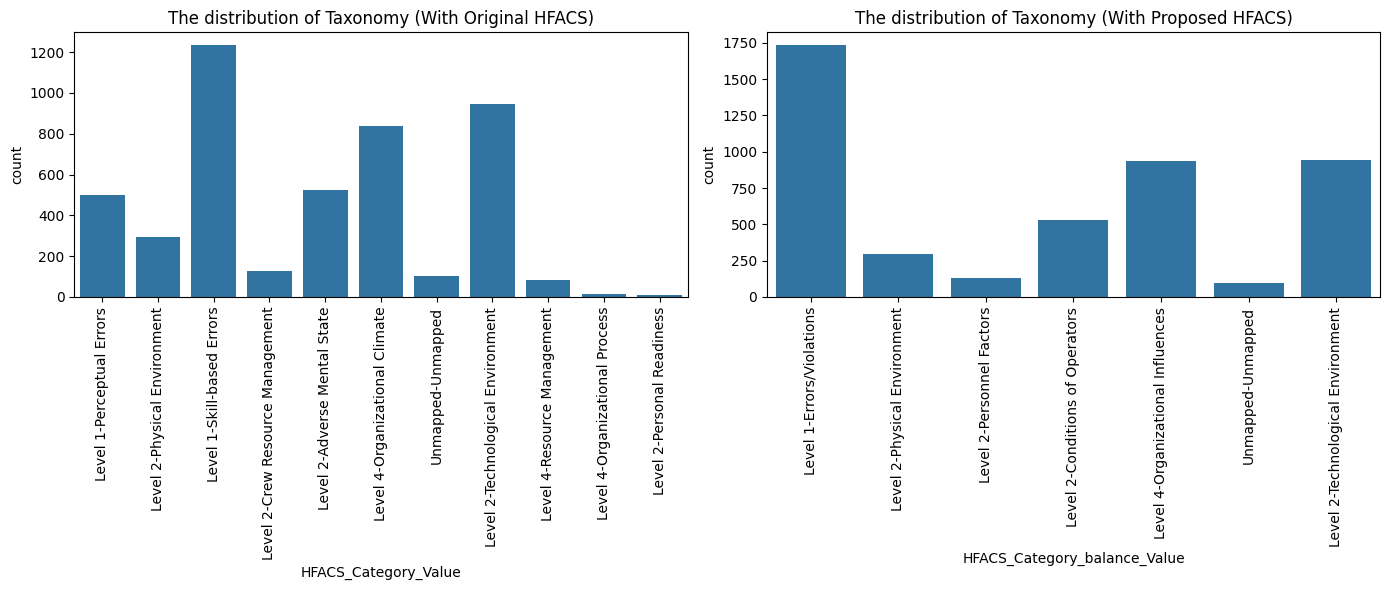

,event_id,date,finding_description,narrative_01,narrative_02,HFACS_Category,HFACS_Category_Level,HFACS_Category_Value,HFACS_Category_balance,HFACS_Category_balance_Level,HFACS_Category_balance_Value
114340,2021216,2023-07-01,Ambiguous,On Day 0 at approximately XA:29 pilot climbed ...,NaN,"(Level 1, Unsafe acts, Errors, Perceptual Errors)",Level 1,Level 1-Perceptual Errors,"(Level 1, Unsafe acts, Errors/Violations, Erro...",Level 1,Level 1-Errors/Violations
208299,2012024,2023-07-01,Weather,Prior to entering Class D airspace at ZZZ; I f...,NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Physical Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Physical Environment
216302,1961438,2023-01-01,Human Factors:Communication Breakdown:ATC Issu...,The weather at TPA on the arrival was 1/4 SM a...,NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Physical Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Physical Environment
216304,1961479,2023-01-01,Situational Awareness; Troubleshooting:Horizon...,On descent into ZZZ setting up for the ILS XX ...,On descent into ZZZ we had ATC reports of tops...,"(Level 1, Unsafe acts, Errors, Skill-based Err...",Level 1,Level 1-Skill-based Errors,"(Level 1, Unsafe acts, Errors/Violations, Erro...",Level 1,Level 1-Errors/Violations
216305,1961497,2023-01-01,Human Factors:Communication Breakdown:Deviatio...,A Ramp Agent brought me a battery powered whee...,NaN,"(Level 2, Preconditions for Unsafe Acts, Perso...",Level 2,Level 2-Crew Resource Management,"(Level 2, Preconditions for Unsafe Acts, Perso...",Level 2,Level 2-Personnel Factors
...,...,...,...,...,...,...,...,...,...,...,...
221031,2085076,2024-02-01,Airport,Cleared by ground to leave FBO ramp via taxiwa...,NaN,"(Level 4, Organizational Influences, Organizat...",Level 4,Level 4-Organizational Climate,"(Level 4, Organizational Influences, Organizat...",Level 4,Level 4-Organizational Influences
221032,2085081,2024-02-01,Time Pressure; Troubleshooting:Navigational Eq...,On approach to Runway 34L I had a LOC/coupling...,NaN,"(Level 1, Unsafe acts, Errors, Skill-based Err...",Level 1,Level 1-Skill-based Errors,"(Level 1, Unsafe acts, Errors/Violations, Erro...",Level 1,Level 1-Errors/Violations
221033,2085092,2024-02-01,Procedure,Sequencing and separation of aircraft are noto...,NaN,"(Level 4, Organizational Influences, Organizat...",Level 4,Level 4-Organizational Climate,"(Level 4, Organizational Influences, Organizat...",Level 4,Level 4-Organizational Influences
221034,2085412,2024-02-01,Airspace Structure,CYEG HAMPO 2 Departure Runway 20. On our brief...,NaN,"(Level 4, Organizational Influences, Organizat...",Level 4,Level 4-Resource Management,"(Level 4, Organizational Influences, Organizat...",Level 4,Level 4-Organizational Influences


In [37]:
sample_df =  asrs_df.copy() #.sample(n=2000)

autoLabeling = AutoLabeling(sample_df)

autoLabeling.do_auto_label()



AutoLabeling sample_size= (2013, 5)


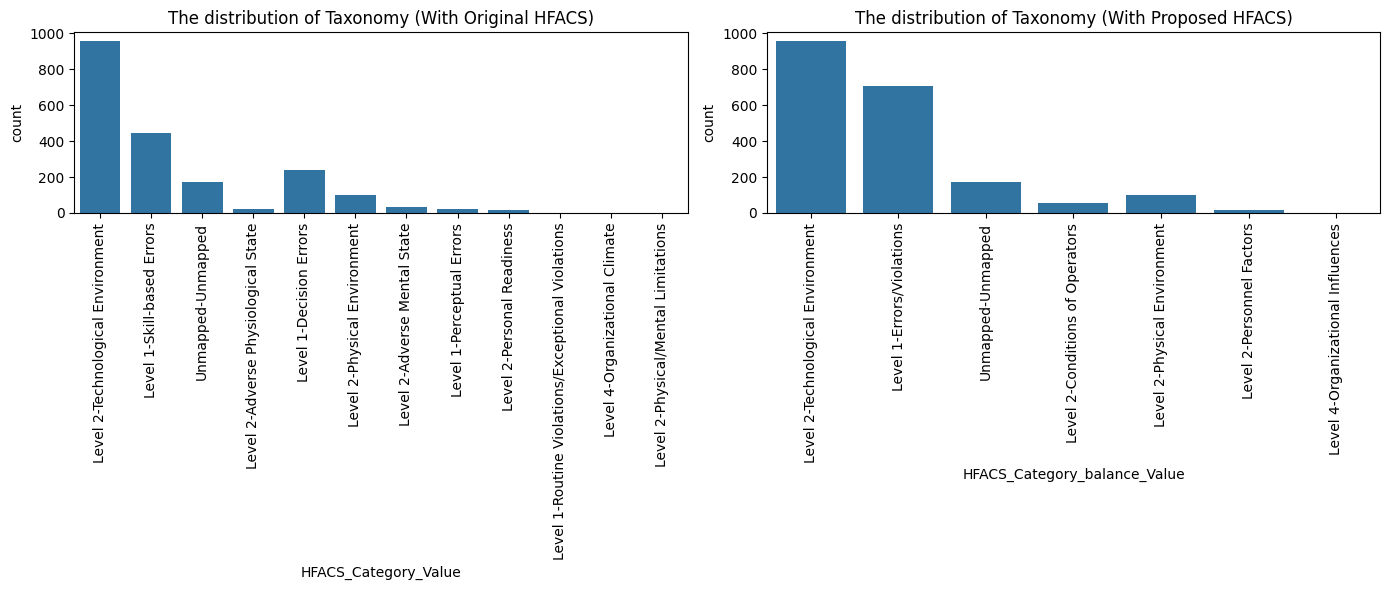

,event_id,date,finding_description,narrative_01,narrative_02,HFACS_Category,HFACS_Category_Level,HFACS_Category_Value,HFACS_Category_balance,HFACS_Category_balance_Level,HFACS_Category_balance_Value
17370,20200102X54844,2020-01-01,Aircraft-Fluids/misc hardware-Fluids-Fuel-Flui...,"The pilot reported that, during a night flight...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
17371,20200101X91024,2020-01-01,Personnel issues-Task performance-Inspection-P...,"HISTORY OF FLIGHTOn January 1, 2020, about 154...",NaN,"(Level 1, Unsafe acts, Errors, Skill-based Err...",Level 1,Level 1-Skill-based Errors,"(Level 1, Unsafe acts, Errors/Violations, Erro...",Level 1,Level 1-Errors/Violations
17374,20200104X54406,2020-01-01,Aircraft-Aircraft power plant-Engine (reciproc...,"HISTORY OF FLIGHTOn January 4, 2020, about 100...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
17375,20200105X53312,2020-01-01,Personnel issues-Task performance-Planning/pre...,"On January 5, 2020, about 1243 central standar...",NaN,"(Level 1, Unsafe acts, Errors, Skill-based Err...",Level 1,Level 1-Skill-based Errors,"(Level 1, Unsafe acts, Errors/Violations, Erro...",Level 1,Level 1-Errors/Violations
17376,20200102X30206,2020-01-01,Aircraft-Aircraft power plant-Engine (reciproc...,"On January 2, 2020, about 1015 eastern standar...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
...,...,...,...,...,...,...,...,...,...,...,...
19393,20231129193450,2023-11-01,Aircraft-Fluids/misc hardware-Fluids-Hydraulic...,"On November 28, 2023, about 1828 eastern stand...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
19394,20231130193454,2023-11-01,Aircraft-Fluids/misc hardware-Fluids-Fuel-Flui...,"On November 28, 2023, about 1031 central stand...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
19395,20231227193576,2023-12-01,Aircraft-Aircraft systems-Landing gear system-...,"On December 26, 2023, about 1221 mountain stan...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
19396,20240117193675,2023-09-01,Aircraft-Aircraft structures-Fuselage-Longeron...,"On September 21, 2023, the operator of a Bell ...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment


In [38]:
sample_df =  ntsb_df.copy() #.sample(n=2000)

autoLabeling = AutoLabeling(sample_df)

autoLabeling.do_auto_label()


AutoLabeling sample_size= (6688, 5)


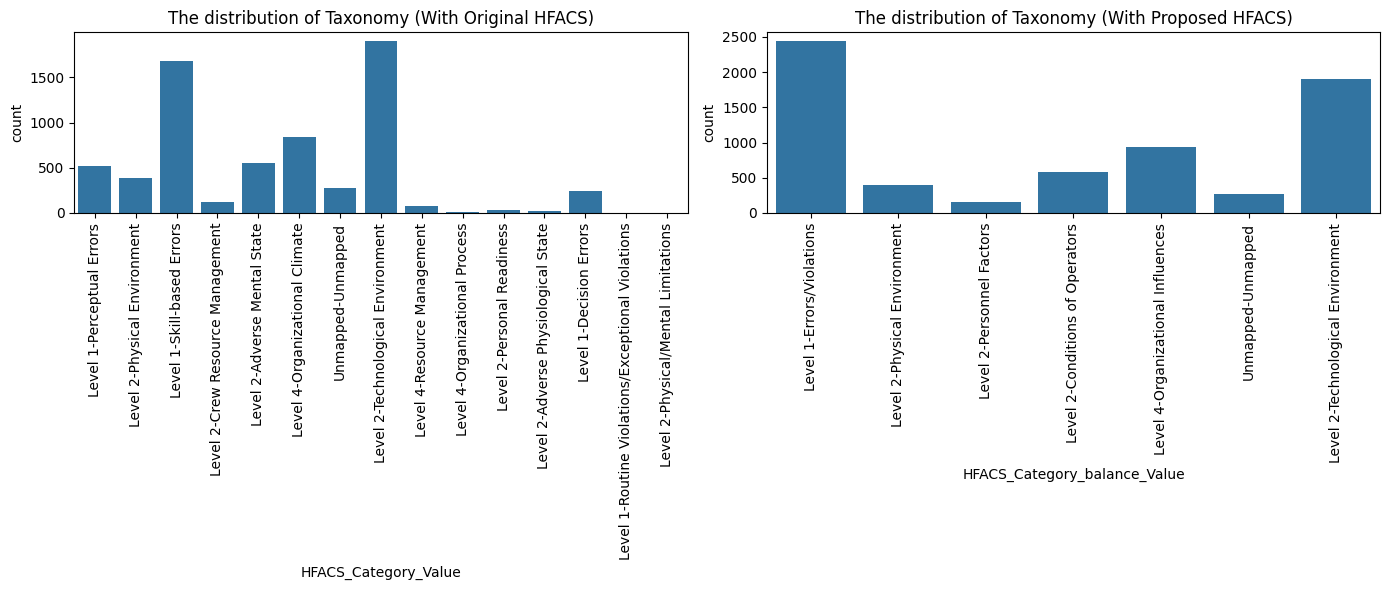

,event_id,date,finding_description,narrative_01,narrative_02,HFACS_Category,HFACS_Category_Level,HFACS_Category_Value,HFACS_Category_balance,HFACS_Category_balance_Level,HFACS_Category_balance_Value
0,2021216,2023-07-01,Ambiguous,On Day 0 at approximately XA:29 pilot climbed ...,NaN,"(Level 1, Unsafe acts, Errors, Perceptual Errors)",Level 1,Level 1-Perceptual Errors,"(Level 1, Unsafe acts, Errors/Violations, Erro...",Level 1,Level 1-Errors/Violations
1,2012024,2023-07-01,Weather,Prior to entering Class D airspace at ZZZ; I f...,NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Physical Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Physical Environment
2,1961438,2023-01-01,Human Factors:Communication Breakdown:ATC Issu...,The weather at TPA on the arrival was 1/4 SM a...,NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Physical Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Physical Environment
3,1961479,2023-01-01,Situational Awareness; Troubleshooting:Horizon...,On descent into ZZZ setting up for the ILS XX ...,On descent into ZZZ we had ATC reports of tops...,"(Level 1, Unsafe acts, Errors, Skill-based Err...",Level 1,Level 1-Skill-based Errors,"(Level 1, Unsafe acts, Errors/Violations, Erro...",Level 1,Level 1-Errors/Violations
4,1961497,2023-01-01,Human Factors:Communication Breakdown:Deviatio...,A Ramp Agent brought me a battery powered whee...,NaN,"(Level 2, Preconditions for Unsafe Acts, Perso...",Level 2,Level 2-Crew Resource Management,"(Level 2, Preconditions for Unsafe Acts, Perso...",Level 2,Level 2-Personnel Factors
...,...,...,...,...,...,...,...,...,...,...,...
6683,20231129193450,2023-11-01,Aircraft-Fluids/misc hardware-Fluids-Hydraulic...,"On November 28, 2023, about 1828 eastern stand...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
6684,20231130193454,2023-11-01,Aircraft-Fluids/misc hardware-Fluids-Fuel-Flui...,"On November 28, 2023, about 1031 central stand...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
6685,20231227193576,2023-12-01,Aircraft-Aircraft systems-Landing gear system-...,"On December 26, 2023, about 1221 mountain stan...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
6686,20240117193675,2023-09-01,Aircraft-Aircraft structures-Fuselage-Longeron...,"On September 21, 2023, the operator of a Bell ...",NaN,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment


In [39]:

sample_df =  asrs_ntsb_df.copy() #.sample(n=2000)

autoLabeling = AutoLabeling(sample_df)

autoLabeling.do_auto_label()

